**Acceso a datos en Drive:**

In [0]:
# Importar daos de Google Drive con Google Colab
from google.colab import drive
# Activa la autentificacion para acceder a datos
drive.mount('/content/drive')
#Nos muestra el directorio de nuestro proyecto
#!ls "/content/drive/Team Drives/IA Proyecto Final"
var_loc = list(dir()) #Listas de variable de entorno

**Importar librerias necesarias:**

In [0]:
import numpy as np #Manejo de matrices 
import scipy.io as sio #Leer datos de archivo original .mat
import matplotlib.pyplot as plt #Mostrar datos
from sklearn.preprocessing import OneHotEncoder as hot_enc #Para trabajar con los datos en CNN
import h5py #Guardar en h5 para luego procesarlos

**Cargar rutas y datos:**

In [0]:
#Rutas de .mat con datos ordenador
r_train = './dmat/train_32x32.mat'
r_test = './dmat/test_32x32.mat'
r_extra = './dmat/test_32x32.mat'

In [0]:
#Rutas de .mat con datos en la nube
r_train = '/content/drive/Team Drives/IA Proyecto Final/dataset/train_32x32.mat'
r_test = '/content/drive/Team Drives/IA Proyecto Final/dataset/test_32x32.mat'
r_extra = '/content/drive/Team Drives/IA Proyecto Final/dataset/extra_32x32.mat'
nextra = 300000

In [0]:
#Cargar datos de diccionarios
train_data = sio.loadmat(r_train)
test_data = sio.loadmat(r_test)
extra_data = sio.loadmat(r_extra)

#Datos ENTRENAMIENTO
x_train = train_data['X']
y_train = train_data['y']
#Datos TEST
x_test = test_data['X']
y_test = test_data['y']
#Datos EXTRA
#x_extra = extra_data['X']
y_extra = extra_data['y']
del extra_data
y_extra = y_extra[:nextra,:]

**Ajustar orden de datos: **

In [6]:
#Se realiza un transpose al principio del tratamiento debido a la forma en la que
#una CNN recibe los datos ya que de manera predeterminada espera los datos con
#formato datos,ancho,alto,canales.
x_train = x_train.transpose((3,0,1,2))
x_test = x_test.transpose((3,0,1,2))
#x_extra = x_extra.transpose((3,0,1,2))

print("x_train tiene y y_train tienen ", x_train.shape[0], " datos")

x_train tiene y y_train tienen  73257  datos


**Arreglar datos de variables dependientes: **

In [7]:
#Contamos la aparición de cada elemento en un numpy
unique, counts = np.unique(y_train, return_counts=True)
print("Los datos en y_train estan distribuidos:")
print(dict(zip(unique, counts)))
print("Numeros en y_train: ",np.unique(y_train), "<- Error con 10")

Los datos en y_train estan distribuidos:
{1: 13861, 2: 10585, 3: 8497, 4: 7458, 5: 6882, 6: 5727, 7: 5595, 8: 5045, 9: 4659, 10: 4948}
Numeros en y_train:  [ 1  2  3  4  5  6  7  8  9 10] <- Error con 10


**Distribución de datos Y:**

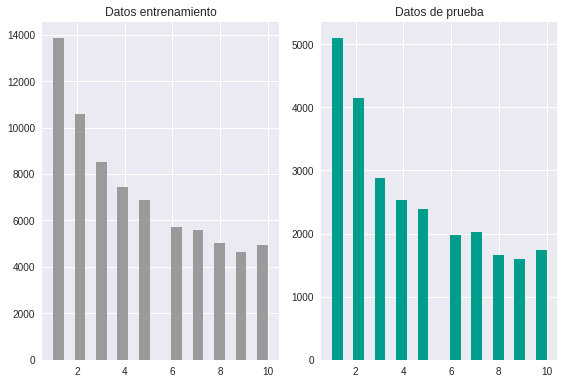

In [8]:
#Grafica que muestra la distribucion de numeros
graf1, (training, test) = plt.subplots(1, 2, sharex=True)

training.hist(y_train, color= '#9b9b9b', bins=20)
training.set_title("Datos entrenamiento")

test.hist(y_test, color='#009C8C', bins=20)
test.set_title("Datos de prueba")

graf1.tight_layout()

In [9]:
def arreglar_lista(lista_y):
    lista_y[lista_y == 10] = 0 #Modificamos el 10 por 0

arreglar_lista(y_train)
arreglar_lista(y_test)
arreglar_lista(y_extra)
print("Numeros actualizados", np.unique(y_train), "<- Correcto")

Numeros actualizados [0 1 2 3 4 5 6 7 8 9] <- Correcto


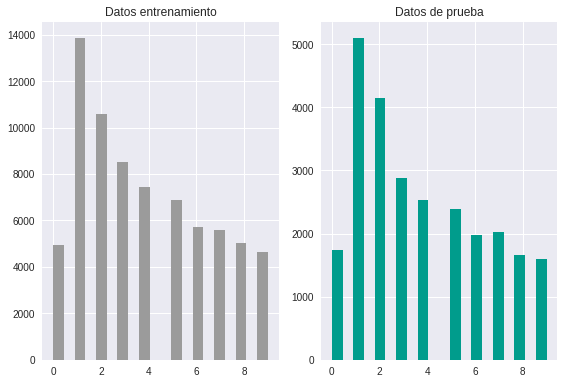

In [10]:
graf2, (training, test) = plt.subplots(1, 2, sharex=True)

training.hist(y_train, color= '#9b9b9b', bins=20)
training.set_title("Datos entrenamiento")

test.hist(y_test, color='#009C8C', bins=20)
test.set_title("Datos de prueba")
graf2.tight_layout()

**Visualización de datos:**

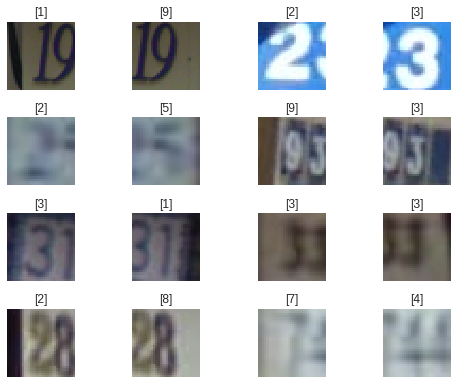

In [11]:
#Parametros: variables dependiente, variable independiente, el #fila, #columnas
#Ej: visualizar(x_test, y_test, 1, 2), devuelveuna fila con dos imagenes con su valor arriba.
#Si tiene un shape(i,32,32,3) es una imagen a color, si tiene un shape de una dimension
#menos es en grayscale ya que se elimina el canal rgb.
def visualizar(x, y, fila, columna):
    img, axes = plt.subplots(fila, columna) #Configuramos la figura 
    for i, j in enumerate(axes.flatten()): # Devuelve un vector numpy para poder iterarlo 
        if x[i].shape == (32, 32, 3): #color
            j.imshow(x[i])
        else:
            j.imshow(x[i,:,:]) #grayscale
            
        j.set_xticks([])
        j.set_yticks([])
        j.set_title(y[i])
        img.tight_layout()
#Flattern funcion por ejemplo si tenemos a = np.array([[1,2], [3,4]]) ; 
#si usamos flatten devueve [1 2 3 4] haciendolo iterable

#plt.imshow(x_train_gris[i,:,:], cmap='gray')
visualizar(x_train, y_train, 4, 4)

**Transformar de RGB a Grayscale:**

In [0]:
# Y = 0.2990R + 0.5870G + 0.1140B --> Formula
def rgb_gray(datos):
    return np.dot(datos, [0.2990, 0.5870, 0.1140])

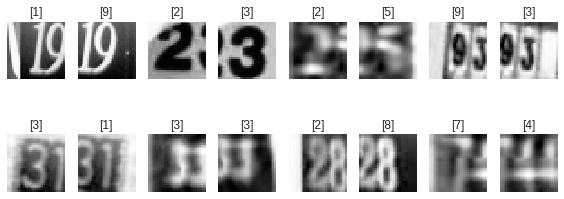

In [13]:
#Cambiar de rgb a gray , con np.dot se eliminan los canales.
x_train_gris = rgb_gray(x_train)
x_test_gris = rgb_gray(x_test)

visualizar(x_train_gris, y_train, 2, 8)

**Normalización de datos: **

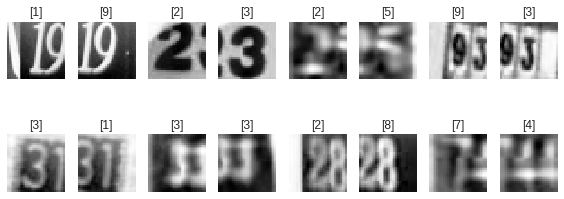

In [14]:
#Funcion para normalizacion de datos
def normalizar(datos):
    media = np.mean(datos, axis=0)
    #Desviacion estandar
    desv = np.std(datos, axis=0)
    # Datos normalizados
    return (datos - media) / desv

x_train_gris_n = normalizar(x_train_gris)
x_test_gris_n = normalizar(x_test_gris)

visualizar(x_train_gris_n, y_train, 2, 8)

**Transformación a categorical:**

In [15]:
enc = hot_enc(categories='auto').fit(y_train.reshape(-1, 1))
#Pasa los datos catergoricos
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_extra = enc.transform(y_extra.reshape(-1, 1)).toarray()

print('Total:',y_train.shape[0]+y_test.shape[0]+y_extra.shape[0], 'datos. ', 
      "Train:", y_train.shape,'Test:',y_test.shape, 'Extra:',y_extra.shape)

#Ejemplo de OHC: Vector ([0, 2, 1])
#([[ 1.,  0.,  0.],[ 0.,  0.,  1.],[ 0.,  1.,  0.],])

Total: 399289 datos.  Train: (73257, 10) Test: (26032, 10) Extra: (300000, 10)


**Guardar datos en h5py **

In [0]:
#Crea un archivo para guardar los datos
h5f = h5py.File('datos.h5', 'w')
#Entrenamiento
h5f.create_dataset('x_train', data=x_train_gris_n)
h5f.create_dataset('y_train', data=y_train)
#Test
h5f.create_dataset('x_test', data=x_test_gris_n)
h5f.create_dataset('y_test', data=y_test)
#Extra
h5f.create_dataset('y_extra', data=y_extra)
#Cerrar y guardar
h5f.close()

**Limpiar variables no necesarias para limpiar memoria**

In [0]:
#Guardamos una lista con las variables relevantes para limpiar los datos extras y la
#anexamos a var_loc que es la lista de variables que no se borraran.
var_imp = 'nextra','var_loc','np','r_extra','rgb_gray','sio','visualizar','normalizar','h5py'
var_loc.extend(var_imp)

#Elimina todas las variables que no este en var_loc, se usa para limpiar memoria
#por capacidad de runtime.
for variable in dir():
    if not variable.startswith(tuple(var_loc)):
        del globals()[variable]        

**Tratado de x_extra**

In [0]:
#Reutiliza los metodos de preprocesamiento y trata las variables independientes
#de los datos extra para despues guardalo en un h5f
extra_data = sio.loadmat(r_extra)
x_extra = extra_data['X']
x_extra = x_extra.transpose((3,0,1,2))
del extra_data

x_extra= x_extra[:nextra,:,:,:]
x_extra = rgb_gray(x_extra)
x_extra = normalizar(x_extra)

In [0]:
#Add dataset de x_extra a nuestro archivo de datos.
h5f = h5py.File('datos.h5', 'a')
h5f.create_dataset('x_extra', data=x_extra)
h5f.close()

**Limpieza completa de todas las variables de entorno:**

In [20]:
#Borramos todas las variables nuestro entorno
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
